In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
from datetime import timedelta

In [2]:
import flow_loop_preprocess_XW as process

In [6]:
path="../../data/Rockwell_Flow_Loop_Data/Flow_Loop_Data_071422.csv"
data=pd.read_csv(path)
data=process.table_formattting(data)

In [7]:
for col in data:
    if data[col].dtype == 'O':
        data[col] = pd.to_datetime(data[col])

i = 0
while i <= (data.shape[1] - 2):
    sub_df = process.pull_feature(i, i+1, data)
    sub_df = sub_df.resample('10S').mean()
    if i == 0:
        df = sub_df
    else:
        df = df.join(sub_df, how='outer')
    i += 2
data = df.loc[:, df.columns.str.contains('Raw')]

data.head(5)

,Loop 1 Flow Raw Value,Loop 2 Flow Raw Value,Tank 1 Level Raw Value,Tank 2 Level Raw Value,Pump 1 Inlet Pressure Raw Value,Pump 1 Outlet Pressure Raw Value,Pump 2 Inlet Pressure Raw Value,Pump 2 Outlet Pressure Raw Value,Pump 1 Speed Feedback Raw Value,Pump 2 Speed Feedback Raw Value
2022-07-14 08:00:00,3997.0,NaN,15985.000000,18321.375000,4590.400000,5168.666667,NaN,4233.500000,4000.500000,3998.333333
2022-07-14 08:00:10,3996.0,3970.666667,15983.235294,18321.555556,4590.250000,5168.642857,NaN,4233.454545,4000.125000,3999.750000
2022-07-14 08:00:20,NaN,NaN,15988.055556,18321.583333,4590.444444,5168.400000,NaN,4233.500000,4000.416667,3998.000000
2022-07-14 08:00:30,3999.5,3972.000000,15984.842105,18321.416667,4590.700000,5168.500000,NaN,4233.571429,4000.500000,NaN
2022-07-14 08:00:40,3996.0,3971.000000,15983.777778,18321.545455,4590.400000,5168.875000,NaN,4233.454545,4000.857143,4001.000000


On this data, there is only maintenance happening, so we expect that we can treat this as normal data. Therefore, we plot the different features over time:

<AxesSubplot:ylabel='Loop 1 Flow Raw Value'>

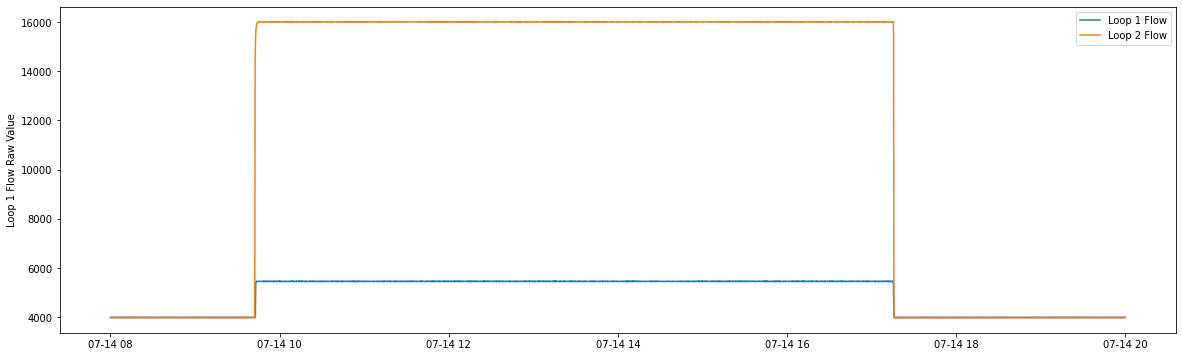

In [8]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.lineplot(x=data.index,y="Loop 1 Flow Raw Value",data=data,label="Loop 1 Flow")
sns.lineplot(x=data.index,y="Loop 2 Flow Raw Value",data=data,label="Loop 2 Flow")

<AxesSubplot:ylabel='Tank 1 Level Raw Value'>

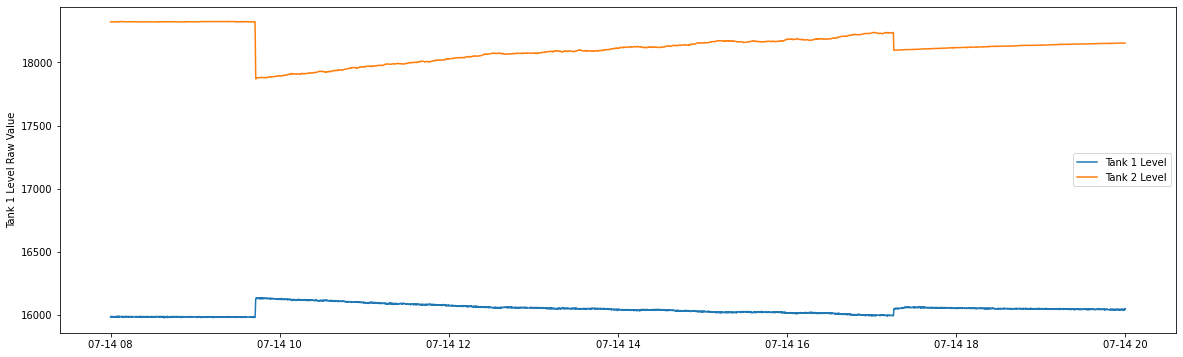

In [10]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.lineplot(x=data.index,y="Tank 1 Level Raw Value",data=data,label="Tank 1 Level")
sns.lineplot(x=data.index,y="Tank 2 Level Raw Value",data=data,label="Tank 2 Level")

<AxesSubplot:ylabel='Pump 1 Inlet Pressure Raw Value'>

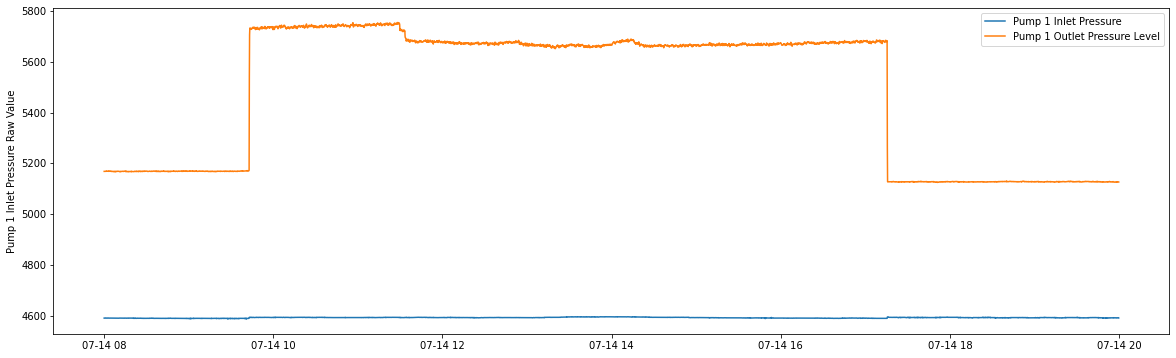

In [11]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.lineplot(x=data.index,y="Pump 1 Inlet Pressure Raw Value",data=data,label="Pump 1 Inlet Pressure")
sns.lineplot(x=data.index,y="Pump 1 Outlet Pressure Raw Value",data=data,label="Pump 1 Outlet Pressure Level")

<AxesSubplot:ylabel='Pump 2 Inlet Pressure Raw Value'>

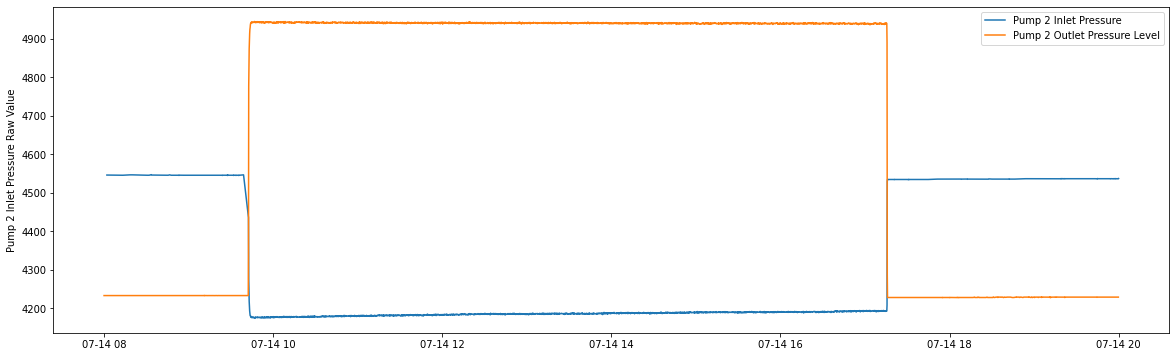

In [12]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.lineplot(x=data.index,y="Pump 2 Inlet Pressure Raw Value",data=data,label="Pump 2 Inlet Pressure")
sns.lineplot(x=data.index,y="Pump 2 Outlet Pressure Raw Value",data=data,label="Pump 2 Outlet Pressure Level")

<AxesSubplot:ylabel='Pump 1 Speed Feedback Raw Value'>

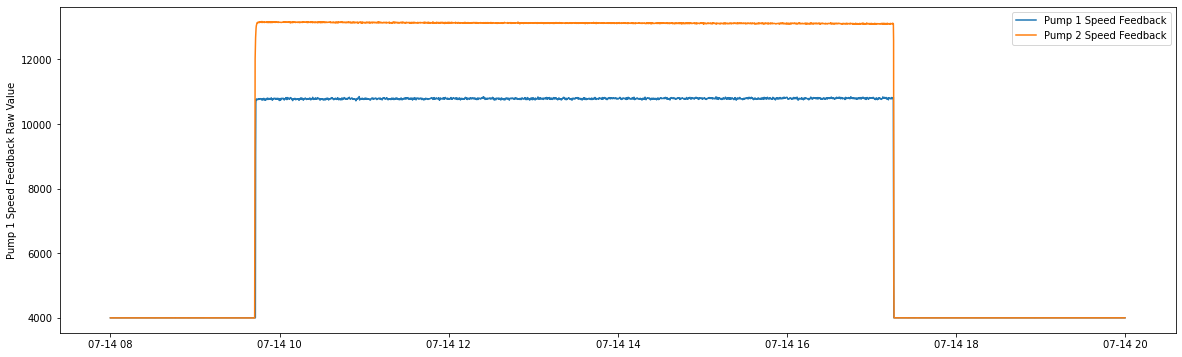

In [13]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.lineplot(x=data.index,y="Pump 1 Speed Feedback Raw Value",data=data,label="Pump 1 Speed Feedback")
sns.lineplot(x=data.index,y="Pump 2 Speed Feedback Raw Value",data=data,label="Pump 2 Speed Feedback")